In [1]:
pip install inscriptis==0.0.3.2

  Created wheel for inscriptis: filename=inscriptis-0.0.3.2-cp36-none-any.whl size=9371 sha256=ff6eb49a5116f9a3c7ed076b00e9a756989f2a98da8a5087294ab42b55ee6bb6
  Stored in directory: /root/.cache/pip/wheels/df/1e/5d/a95fde23bb1f9dee6b4d4d22d4542c80ee603a5a6a9ca82118
Successfully built inscriptis
Note: you may need to restart the kernel to use updated packages.


In [2]:
import urllib.request
from inscriptis import get_text
import numpy as np
import pandas as pd 
import nltk 

url = "https://www.nytimes.com/2017/01/26/arts/dance/rehearse-ice-feet-repeat-the-life-of-a-new-york-city-ballet-corps-dancer.html"
html = urllib.request.urlopen(url).read().decode('utf8').encode('ascii', 'ignore').decode('utf-8')

text = get_text(html)
reformatted_text = text.replace("!@#$%^&*()[]{};:,./<>?\|`~-=_+“", " ")

Convert the Text Data to Series

In [3]:
text_series = pd.Series([text])

Further Reshape the text and Split the text into sentences

In [4]:
datafile_array = np.array(text_series.str.split("\n", n = 322, expand = True))

In [5]:
datafile = pd.DataFrame(datafile_array.reshape(-1,1))
datafile.columns = ["TextDetails"]

Filter out blanks and unwanted rows

In [6]:
datafile = datafile[datafile['TextDetails'].map(len) > 50].reset_index()
Filtered_datafile = pd.DataFrame(datafile['TextDetails'])

Some Visualizations Added

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

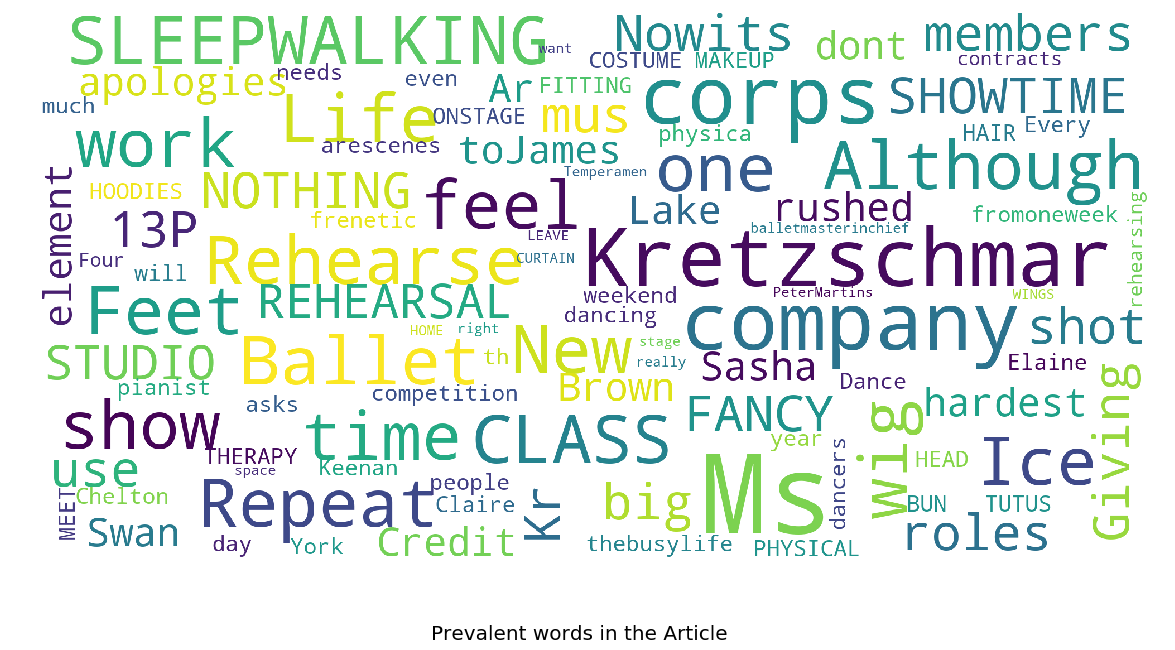

In [8]:
show_wordcloud(Filtered_datafile['TextDetails'].sample(30), title = 'Prevalent words in the Article')

In [9]:
Filtered_datafile.to_csv("textExtract.csv", index = False)